In [ ]:
#Feature Engineering: Add the feature engineering step before splitting the data into training and testing sets.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
# Load the dataset from a CSV file
data = pd.read_csv("../Resources/HousingData.csv")

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
clean_data = data.dropna()
clean_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [7]:
# Extract the features (X) and target variable (y)
X = clean_data.drop("MEDV", axis=1).values
y = clean_data["MEDV"].values

In [11]:
# Feature Engineering: Adding polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Data preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_predictions = linear_regression.predict(X_test)
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_r2 = 1 - (linear_regression_mse / y_test.var())

In [15]:
# Decision Tree Regression
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = 1 - (decision_tree_mse / y_test.var())

In [16]:
# Random Forest Regression
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = 1 - (random_forest_mse / y_test.var())

In [17]:
# Evaluate the models
print("Linear Regression R-squared:", linear_regression_r2)
print("Decision Tree R-squared:", decision_tree_r2)
print("Random Forest R-squared:", random_forest_r2)

Linear Regression R-squared: 0.6270849941673176
Decision Tree R-squared: 0.6738120823993584
Random Forest R-squared: 0.6589812450499237


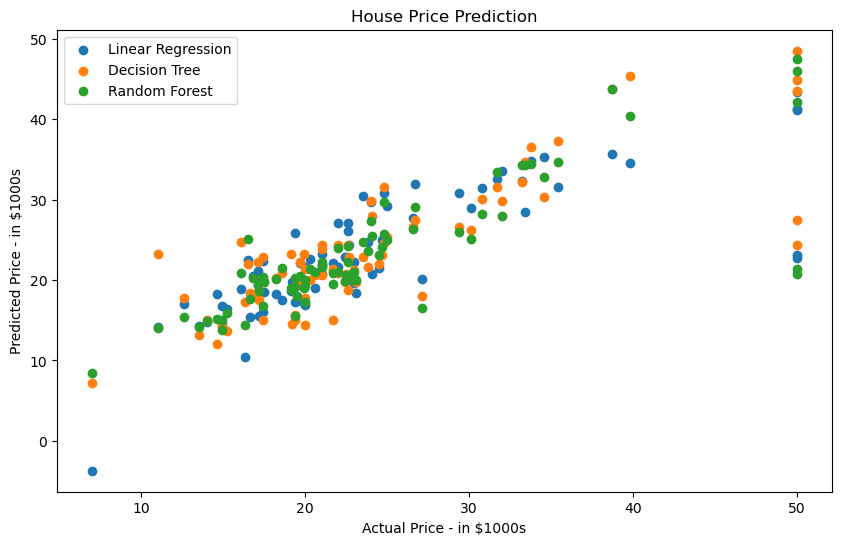

In [18]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_regression_predictions, label='Linear Regression')
plt.scatter(y_test, decision_tree_predictions, label='Decision Tree')
plt.scatter(y_test, random_forest_predictions, label='Random Forest')
plt.xlabel('Actual Price - in $1000s')
plt.ylabel('Predicted Price - in $1000s')
plt.title('House Price Prediction')
plt.legend()
plt.show()